In [41]:
import numpy as np
import pandas as pd
import os


os.getcwd()
root_dir = os.path.dirname(os.getcwd())
root_dir
data_dir = os.path.join(root_dir, 'Data_set')
data_dir
data_set = os.path.join(data_dir, 'sales Data.csv')
data_set

print("root_dir: ", root_dir)
print("data_dir: ", data_dir)    
print("data_set: ", data_set)


sales_data =pd.read_csv(data_set)
sales_data.head(100)

root_dir:  c:\Users\tareq\sales Project
data_dir:  c:\Users\tareq\sales Project\Data_set
data_set:  c:\Users\tareq\sales Project\Data_set\sales Data.csv


,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,NaN
1,1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808
...,...,...,...,...,...,...,...,...,...,...
95,95,1,A,8,2011-01-07,36599.46,False,9.038889,0.786176,7.742
96,96,1,A,9,2010-02-05,16930.99,False,5.727778,0.679451,8.106
97,97,1,A,9,2010-03-05,24064.70,False,8.055556,0.693452,8.106
98,98,1,A,9,2010-04-02,25435.02,False,16.816667,0.718284,7.808


In [42]:
sales_data[['type']].value_counts()


type
A       9872
B        902
Name: count, dtype: int64

In [43]:
sales_data.groupby('type')
sales_data.head()
sales_data.drop(columns=['Unnamed: 0'], inplace=True)
sales_data.head()

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,NaN
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [44]:
sale = sales_data.groupby('type')[["weekly_sales","unemployment"]].agg(['mean', 'std', 'min', 'max'])
sale.head()



weekly_sales                                  unemployment            \
              mean           std     min        max         mean       std   
type                                                                         
A     23672.366891  30130.066966 -1098.0  293966.05     7.972616  0.521796   
B     25696.678370  31155.867745  -798.0  232558.51     9.279323  0.335157   

                    
        min    max  
type                
A     3.879  8.992  
B     7.170  9.765

In [45]:
grp_sale = sales_data.pivot_table(
    index='type', 
    values=['temperature_c','unemployment'], 
    aggfunc=['mean', 'std', 'min', 'max'],
    columns =  ['is_holiday'])
grp_sale.head(10)





mean                                           std  \
           temperature_c            unemployment         temperature_c   
is_holiday         False      True         False   True          False   
type                                                                     
A              15.247873  11.165833     7.973175  7.8351      9.877466   
B              21.208636  22.422222     9.280973  8.5365      8.665274   

                                                      min             \
                     unemployment           temperature_c              
is_holiday     True         False     True          False      True    
type                                                                   
A           9.727681     0.520699  0.740173     -8.366667  -5.488889   
B           9.176675     0.332225  0.936916      6.350000  15.933333   

                                         max                                 
           unemployment        temperature_c            unemployment         
is_holiday        False  True          False      True         False  True   
type                                                                         
A                 3.879  5.143     33.300000  26.277778        8.992  8.992  
B                 7.170  7.874     33.827778  28.911111        9.765  9.199

In [46]:
#For slicing row
Row = sales_data.iloc[1:5,3:5]
print(Row)

         date  weekly_sales
1  2010-03-05      21827.90
2  2010-04-02      57258.43
3  2010-05-07      17413.94
4  2010-06-04      17558.09


In [47]:
#For slicing row
sales_data.values



array([[1, 'A', 1, ..., 5.727777777777779, 0.6794508388787476, nan],
       [1, 'A', 1, ..., 8.055555555555555, 0.693451964252221, 8.106],
       [1, 'A', 1, ..., 16.81666666666667, 0.718284148876872, 7.808],
       ...,
       [39, 'A', 99, ..., 27.28888888888889, 0.911922354513778, 6.989],
       [39, 'A', 99, ..., 25.64444444444444, 0.8601446078496121,
        6.622999999999999],
       [39, 'A', 99, ..., 22.25, 0.955510763695346, 6.228]],
      shape=(10774, 9), dtype=object)

In [48]:
sales_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   store                 10774 non-null  int64  
 1   type                  10774 non-null  object 
 2   department            10774 non-null  int64  
 3   date                  10774 non-null  object 
 4   weekly_sales          10773 non-null  float64
 5   is_holiday            10774 non-null  bool   
 6   temperature_c         10774 non-null  float64
 7   fuel_price_usd_per_l  10774 non-null  float64
 8   unemployment          10772 non-null  float64
dtypes: bool(1), float64(4), int64(2), object(2)
memory usage: 684.0+ KB


Identify Null values and Replace null values or remove 


In [49]:
mask = sales_data.isnull()
print(mask.sum())

store                   0
type                    0
department              0
date                    0
weekly_sales            1
is_holiday              0
temperature_c           0
fuel_price_usd_per_l    0
unemployment            2
dtype: int64


In [50]:
#how to check missing values
sales_data[sales_data.isnull().any(axis=1)]



,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,NaN
18,1,A,2,2010-08-06,50031.73,False,30.644444,0.693980,NaN
21,1,A,2,2010-11-05,NaN,False,14.855556,0.710359,7.838


In [51]:
t=sales_data.dropna()
t.head(25)

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808
5,1,A,1,2010-07-02,16333.14,False,27.172222,0.705076,7.787
6,1,A,1,2010-08-06,17508.41,False,30.644444,0.693980,7.787
7,1,A,1,2010-09-03,16241.78,False,27.338889,0.680772,7.787
8,1,A,1,2010-10-01,20094.19,False,22.161111,0.687640,7.838
9,1,A,1,2010-11-05,34238.88,False,14.855556,0.710359,7.838
10,1,A,1,2010-12-03,22517.56,False,9.594444,0.715378,7.838


In [52]:
#how to replace null values using average values

# sales_data['unemployment'].fillna(
#     value = sales_data['unemployment'].mean()
# )
sales_data['unemployment'] = sales_data['unemployment'].fillna(
    value = sales_data['unemployment'].mean()
)
print(sales_data)
   





       store type  department        date  weekly_sales  is_holiday  \
0          1    A           1  2010-02-05      24924.50       False   
1          1    A           1  2010-03-05      21827.90       False   
2          1    A           1  2010-04-02      57258.43       False   
3          1    A           1  2010-05-07      17413.94       False   
4          1    A           1  2010-06-04      17558.09       False   
...      ...  ...         ...         ...           ...         ...   
10769     39    A          99  2011-12-09        895.00       False   
10770     39    A          99  2012-02-03        350.00       False   
10771     39    A          99  2012-06-08        450.00       False   
10772     39    A          99  2012-07-13          0.06       False   
10773     39    A          99  2012-10-05        915.00       False   

       temperature_c  fuel_price_usd_per_l  unemployment  
0           5.727778              0.679451      8.082034  
1           8.055556         

In [53]:
sales_data.head(20)


,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.082034
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106000
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808000
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808000
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808000
5,1,A,1,2010-07-02,16333.14,False,27.172222,0.705076,7.787000
6,1,A,1,2010-08-06,17508.41,False,30.644444,0.693980,7.787000
7,1,A,1,2010-09-03,16241.78,False,27.338889,0.680772,7.787000
8,1,A,1,2010-10-01,20094.19,False,22.161111,0.687640,7.838000
9,1,A,1,2010-11-05,34238.88,False,14.855556,0.710359,7.838000


In [54]:
sales_data.isnull().head(20)


,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False


In [55]:

sales_data


,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.082034
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106000
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808000
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808000
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808000
...,...,...,...,...,...,...,...,...,...
10769,39,A,99,2011-12-09,895.00,False,9.644444,0.834256,7.716000
10770,39,A,99,2012-02-03,350.00,False,15.938889,0.887619,7.244000
10771,39,A,99,2012-06-08,450.00,False,27.288889,0.911922,6.989000
10772,39,A,99,2012-07-13,0.06,False,25.644444,0.860145,6.623000


In [56]:
sales_data =pd.read_csv(data_set)
sales_data.head(25)

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,NaN
1,1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808
5,5,1,A,1,2010-07-02,16333.14,False,27.172222,0.705076,7.787
6,6,1,A,1,2010-08-06,17508.41,False,30.644444,0.693980,7.787
7,7,1,A,1,2010-09-03,16241.78,False,27.338889,0.680772,7.787
8,8,1,A,1,2010-10-01,20094.19,False,22.161111,0.687640,7.838
9,9,1,A,1,2010-11-05,34238.88,False,14.855556,0.710359,7.838


In [57]:
#unemployment column replacement null values with mean
sales_data['unemployment'] = sales_data['unemployment'].fillna(
    value = sales_data['unemployment'].mean()
)
print(sales_data)

       Unnamed: 0  store type  department        date  weekly_sales  \
0               0      1    A           1  2010-02-05      24924.50   
1               1      1    A           1  2010-03-05      21827.90   
2               2      1    A           1  2010-04-02      57258.43   
3               3      1    A           1  2010-05-07      17413.94   
4               4      1    A           1  2010-06-04      17558.09   
...           ...    ...  ...         ...         ...           ...   
10769       10769     39    A          99  2011-12-09        895.00   
10770       10770     39    A          99  2012-02-03        350.00   
10771       10771     39    A          99  2012-06-08        450.00   
10772       10772     39    A          99  2012-07-13          0.06   
10773       10773     39    A          99  2012-10-05        915.00   

       is_holiday  temperature_c  fuel_price_usd_per_l  unemployment  
0           False       5.727778              0.679451      8.082034  
1    

In [58]:
sales_data.head(25)

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.082034
1,1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106000
2,2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808000
3,3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808000
4,4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808000
5,5,1,A,1,2010-07-02,16333.14,False,27.172222,0.705076,7.787000
6,6,1,A,1,2010-08-06,17508.41,False,30.644444,0.693980,7.787000
7,7,1,A,1,2010-09-03,16241.78,False,27.338889,0.680772,7.787000
8,8,1,A,1,2010-10-01,20094.19,False,22.161111,0.687640,7.838000
9,9,1,A,1,2010-11-05,34238.88,False,14.855556,0.710359,7.838000


In [59]:
sales_data.dropna(axis = 0)


,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.082034
1,1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106000
2,2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808000
3,3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808000
4,4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808000
...,...,...,...,...,...,...,...,...,...,...
10769,10769,39,A,99,2011-12-09,895.00,False,9.644444,0.834256,7.716000
10770,10770,39,A,99,2012-02-03,350.00,False,15.938889,0.887619,7.244000
10771,10771,39,A,99,2012-06-08,450.00,False,27.288889,0.911922,6.989000
10772,10772,39,A,99,2012-07-13,0.06,False,25.644444,0.860145,6.623000


Identify Duplicate values and remove

In [60]:
sales_data.duplicated().sum()


np.int64(0)

In [61]:
duplicate_rows = sales_data[sales_data.duplicated()]
duplicate_rows.head(50)

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment


In [62]:
sales_data.drop_duplicates(inplace=True)

In [63]:
sales_data.duplicated().sum()

np.int64(0)

In [64]:
sales_data.head(-1)

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.082034
1,1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106000
2,2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808000
3,3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808000
4,4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808000
...,...,...,...,...,...,...,...,...,...,...
10768,10768,39,A,99,2011-11-11,50.00,False,17.283333,0.870976,7.716000
10769,10769,39,A,99,2011-12-09,895.00,False,9.644444,0.834256,7.716000
10770,10770,39,A,99,2012-02-03,350.00,False,15.938889,0.887619,7.244000
10771,10771,39,A,99,2012-06-08,450.00,False,27.288889,0.911922,6.989000


In [65]:
sales_data.info()
sales_data.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10774 non-null  int64  
 1   store                 10774 non-null  int64  
 2   type                  10774 non-null  object 
 3   department            10774 non-null  int64  
 4   date                  10774 non-null  object 
 5   weekly_sales          10773 non-null  float64
 6   is_holiday            10774 non-null  bool   
 7   temperature_c         10774 non-null  float64
 8   fuel_price_usd_per_l  10774 non-null  float64
 9   unemployment          10774 non-null  float64
dtypes: bool(1), float64(4), int64(3), object(2)
memory usage: 768.2+ KB


,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.082034
1,1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106000
2,2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808000
3,3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808000
4,4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808000
5,5,1,A,1,2010-07-02,16333.14,False,27.172222,0.705076,7.787000
6,6,1,A,1,2010-08-06,17508.41,False,30.644444,0.693980,7.787000
7,7,1,A,1,2010-09-03,16241.78,False,27.338889,0.680772,7.787000
8,8,1,A,1,2010-10-01,20094.19,False,22.161111,0.687640,7.838000
9,9,1,A,1,2010-11-05,34238.88,False,14.855556,0.710359,7.838000


In [66]:
sales_data.head(20)

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.082034
1,1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106000
2,2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808000
3,3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808000
4,4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808000
5,5,1,A,1,2010-07-02,16333.14,False,27.172222,0.705076,7.787000
6,6,1,A,1,2010-08-06,17508.41,False,30.644444,0.693980,7.787000
7,7,1,A,1,2010-09-03,16241.78,False,27.338889,0.680772,7.787000
8,8,1,A,1,2010-10-01,20094.19,False,22.161111,0.687640,7.838000
9,9,1,A,1,2010-11-05,34238.88,False,14.855556,0.710359,7.838000


In [67]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10774 non-null  int64  
 1   store                 10774 non-null  int64  
 2   type                  10774 non-null  object 
 3   department            10774 non-null  int64  
 4   date                  10774 non-null  object 
 5   weekly_sales          10773 non-null  float64
 6   is_holiday            10774 non-null  bool   
 7   temperature_c         10774 non-null  float64
 8   fuel_price_usd_per_l  10774 non-null  float64
 9   unemployment          10774 non-null  float64
dtypes: bool(1), float64(4), int64(3), object(2)
memory usage: 768.2+ KB


In [68]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style="darkgrid")

In [69]:
sales_data.columns

Index(['Unnamed: 0', 'store', 'type', 'department', 'date', 'weekly_sales',
       'is_holiday', 'temperature_c', 'fuel_price_usd_per_l', 'unemployment'],
      dtype='object')

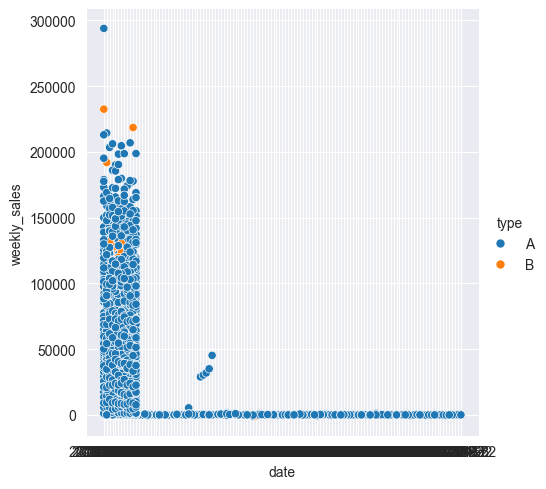

In [70]:
sns.relplot(
    data = sales_data,
    x = 'date',
    y = 'weekly_sales',
    hue = 'type',
    
)

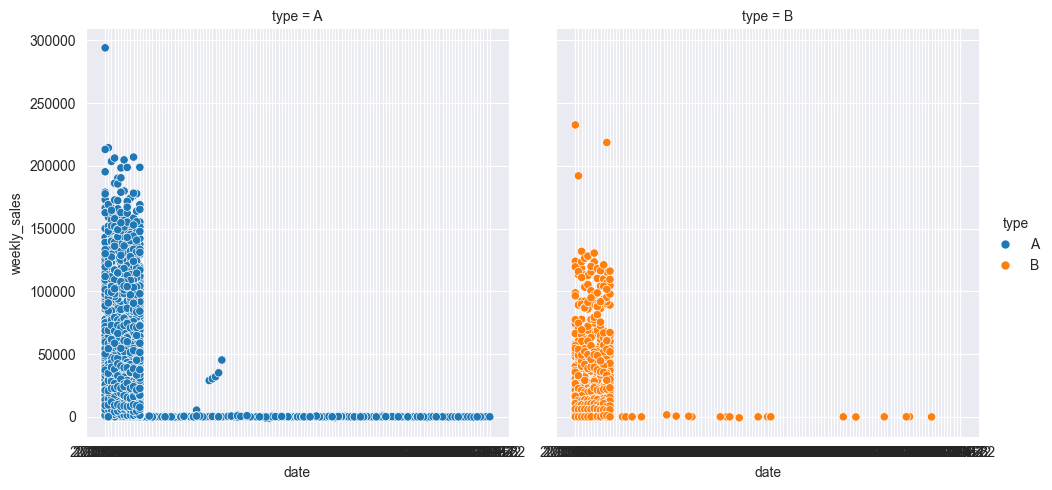

In [71]:
sns.set_style(style="darkgrid")
sns.relplot(
    data = sales_data,
    x = 'date',
    y = 'weekly_sales',
    hue = 'type',
    col='type',
    col_wrap=2,
    
)

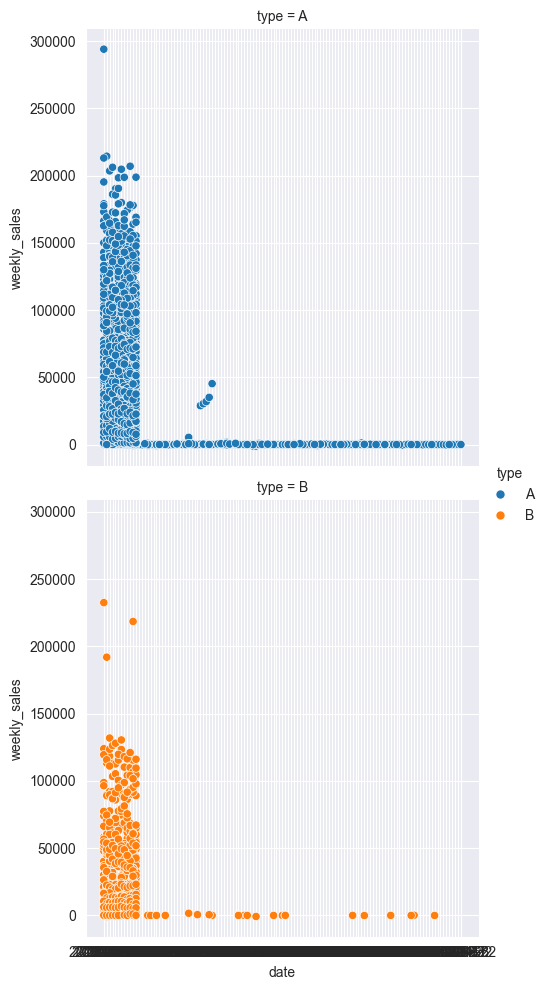

In [72]:
sns.relplot(
    data = sales_data,
    x = 'date',
    y = 'weekly_sales',
    hue = 'type',
    row='type',
    
    
    )
    

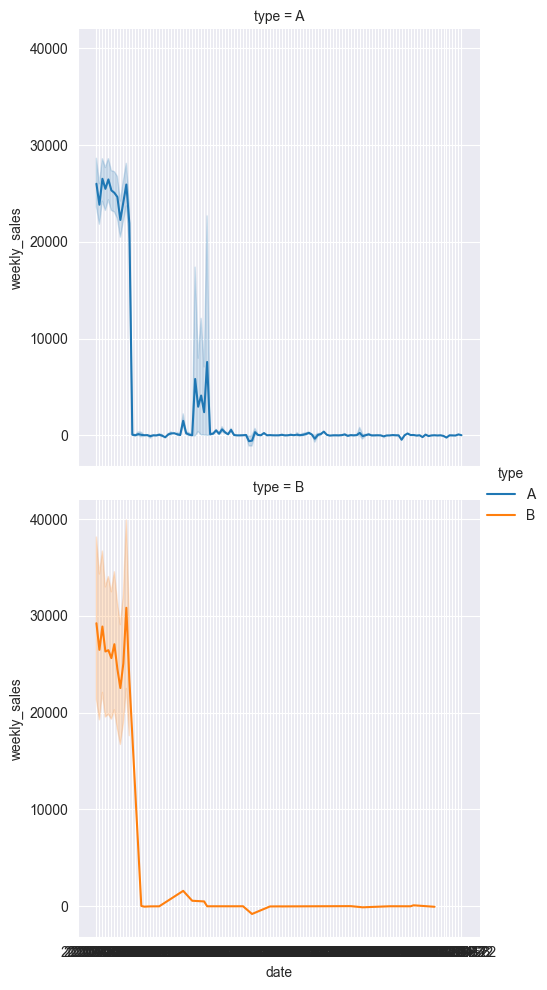

In [73]:
sns.relplot(
    data = sales_data,
    x = 'date',
    y = 'weekly_sales',
    hue = 'type',
    row='type',
    kind='line',
 
    
    )

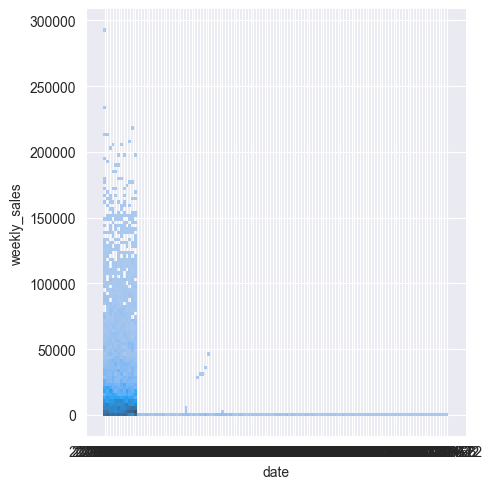

In [77]:
sns.displot(
    data = sales_data,
    x = 'date',
    y = 'weekly_sales',
  
 
    
    )